In [113]:
# Load data
from sklearn.datasets import load_wine
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

d = load_wine()
x = d['data']
y = d['target']

y[y==2] = 1

x = np.random.randn(100,3)*1+[3,5,1]
x = np.concatenate([x, np.random.randn(100,3)*1+[-6, 5, -1]])
y=np.concatenate([np.zeros(100),np.ones(100)])

y[y==0]=-1


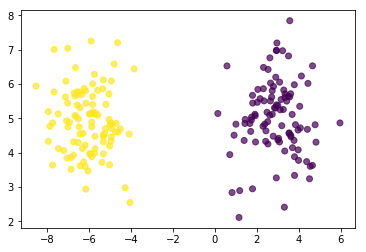

In [114]:
plt.scatter(x[:,0], x[:,1], c=y, alpha=0.7)

In [173]:
from scipy.optimize import minimize

def f_v(w, x, y, alpha):
    p = 1-y*x.dot(w)
    v = np.max(np.concatenate([np.zeros((1,p.shape[0])), p.reshape((1,-1))]), axis=0)
    return np.mean(v)+alpha*sum(abs(w[:-1]))
#     return np.mean(v)+alpha*w.dot(w.T)


def g_v(w, x, y, alpha):
    g = np.zeros((x.shape[0], x.shape[1]))
    p = 1-y*x.dot(w)
    for i in range(x.shape[0]):
        if p[i] > 0:
            g[i,:]=-y[i]*x[i,:]
            
    return (np.mean(g, axis=0)+np.concatenate([alpha*np.sign(w[:-1]), [0]]))

m,n=x.shape
x1 = np.concatenate([x,np.ones((m,1))],axis=1)

w = np.random.rand(x1.shape[1])
# v = f_v(w, x, y, .1)
# g = g_v(w, x, y, .1)
alpha = .99

res = minimize(f_v, w, jac=g_v, args=(x1, y, alpha), options={'gtol': 1e-18, 'disp': True})
w = res.x
w

         Current function value: 0.623226
         Iterations: 3
         Function evaluations: 58
         Gradient evaluations: 53


array([-0.32508545, -0.14461903, -0.09670211,  0.70097015])

In [175]:
f_v(w, x1, y, alpha)

0.6232259966944851

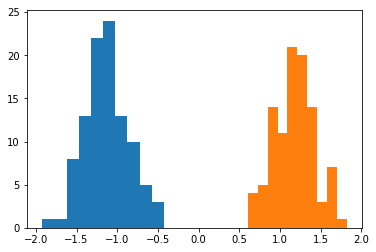

In [153]:
x_svm = x1.dot(w)
for i in np.unique(y):
    plt.hist(x_svm[np.where(y==i)])
plt.show()
